In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loan = pd.read_csv('loan.csv', engine='python')


##Lending Club Project
1.data understing
2.data cleaning
3.data analysis
4.recommendation

##1.Data understanding

In [ ]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
loan.shape

(39717, 111)

In [ ]:
loan.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

##2.Data cleaning

In [ ]:
##finding the isnull columns that are present in the data set
loan.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
tax_liens,39
tot_hi_cred_lim,39717
total_bal_ex_mort,39717
total_bc_limit,39717


In [ ]:
#now we will be checking the percentage of missing datas in each colums
null_value_per=loan.isnull().mean()*100
print(null_value_per)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


this shows the percentage of data that is missing in each and every column now as this columns are empty we will be dropping thoes columns and then we will see the sahpe(row and column no ),we will be first dropping the columns having null values more than 90 per ,if we directly drop the nullvalue per it will drop all the columns and data set will be empty

In [ ]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
null_value_per=null_value_per[null_value_per>85].index


now this are the data which are like completly empty or almost completely empty so we will be droping this columns completely

In [ ]:
print(null_value_per)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [ ]:
loan=loan.drop(null_value_per,axis=1)

In [ ]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [ ]:
loan.shape

(39717, 55)

we have removed columns that have no data in them now we will be checking again for the columns ,to check wether is there still  any columns with major missing data

In [ ]:
loan.isnull().mean()*100

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


here we have 2 columns that have major missing data to it 1.mnths since denlinq 2.desc(loan descripti provided by borrower )this two columns have 1and 44 per empty data to them so we will be removing this 2 columns specially

In [ ]:
clmns_to_be_rem=["mths_since_last_delinq","desc"]

In [ ]:
loan=loan.drop(clmns_to_be_rem,axis=1)

In [ ]:
print(loan)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B        B2  ...          171.62   

we can see two columns got dropped now again we will be seeing the percentage of missing data in the data set

In [ ]:
loan.isnull().mean()*100

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


we have cleaned the unnesscarray empty columns from the data set

##Row wise data cleaning

first we will be cheking the per of empty data row wise

In [ ]:
loan.isnull().sum(axis=1)

,0
0,1
1,0
2,1
3,0
4,0
...,...
39712,4
39713,4
39714,5
39715,5


as we have seen the no of missing values in each row of the data set ,as i can see the max amount of missing values per column is 5 but it can be greater than that also so fr that we will check the row wich is having max missing values


In [ ]:
loan.isnull().sum(axis=1).max()

5

see the max value of missing values of row is 5 so there is no logic in removing a row which is onluy having 5 missing values ,as a conclusion the data cleaning in row will not be done here

so we have pretty much cleaned the data now we will be jumping for the data analysis

##Data Analysis

while analysis the data we will always find the columns which we will come in help to us while we are analysisng ,there are multipul columns such as applicants attirbutes wont come handy to us while analysisng so we will be droping thoes columns even they have less missing values cause at the time of application the predecators that we will work with wont come under persons height cast race or any type of thing related personal to the applicant

In [ ]:
behaviour_var = [
    "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec",
    "revol_bal", "revol_util", "total_acc", "out_prncp", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt",
    "last_credit_pull_d", "application_type"
]


this are the variables which are of no use to us while we see the applicants application , so we will drop this columns

In [ ]:
loan=loan.drop(behaviour_var,axis=1)

In [ ]:
print(loan)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...    dti  \
0       36 months   10.65%       162.87     B        B2  ...  27.65   
1       60 months

In [ ]:
loan.shape

(39717, 33)

now check after removing columns which cant not be made in use is there still any xolumns lefts in the category where the column will not be taken in use

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

1.zip code,2.addr_state(state of the borrower mentioned in the application)again after seeing the columns we have found this two which wont come in use if we are making  A   Predictory factor for the applicants that will apply for the loan ,so we will drop this two columns

In [ ]:
drop_col=["zip_code","addr_state"]

In [ ]:
loan=loan.drop(drop_col,axis=1)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
loan.shape

(39717, 31)

we have succesfully dropped all unnessacry columns from data ,now we will be doing analysis taking the driving factors from the data set and seeing how how the other factor works when compared with it

before doing analysis we will also first clean and set the correct data types to each and every fields so we will first fetch out all the fields with wrong data fields

1.int_rate(obj-->int)

##converstion of data type

In [ ]:
import re as r
loan['int_rate']=loan['int_rate'].str.extract(r'(\d+)').astype(int).astype(float)


In [ ]:
loan.int_rate

,int_rate
0,10.0
1,15.0
2,15.0
3,13.0
4,12.0
...,...
39712,8.0
39713,10.0
39714,8.0
39715,7.0


we have succesfully extracted % from the integer part

In [ ]:
#analysing and comparing other fields wrt loan_status

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
loan.loan_status.value_counts()




,count
loan_status,
Fully Paid,32950
Charged Off,5627
Current,1140


we will be dropping the current field from the loan status

In [ ]:
loan.drop(loan[loan['loan_status'] == "Current"].index, inplace=True)


In [ ]:
loan['loan_status'].value_counts()

,count
loan_status,
Fully Paid,32950
Charged Off,5627


now we will be changing the labbels of fully paid :-1 and charged off:-0 and will check the updates

In [ ]:
loan['loan_status']=loan['loan_status'].replace({"Fully Paid":1,"Charged Off":0})

/tmp/ipython-input-1900663103.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan['loan_status']=loan['loan_status'].replace({"Fully Paid":1,"Charged Off":0})


In [ ]:
loan['loan_status'].value_counts()

,count
loan_status,
1,32950
0,5627


we have succesfully coverted the labels of charged off and fully paid

we will see the data in per form  to make it more clear about how  many per of total falls in the caterory of charged off

In [ ]:
loan['loan_status'].mean()*100

np.float64(85.41358840760039)

In [ ]:
loan['loan_status'].value_counts(normalize=True)*100

,proportion
loan_status,
1,85.413588
0,14.586412


there is 14.586 per of ppl who falls under the category of charged off from the total applicants that have applied for the loan

now create a bar plot to see the field visually

/tmp/ipython-input-3773260621.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="loan_status",loc="upper left")
/tmp/ipython-input-3773260621.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="loan_status",data=loan,palette='RdYlGn')
/tmp/ipython-input-3773260621.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fully Paid','Charged Off'],rotation =45,fontsize=12)


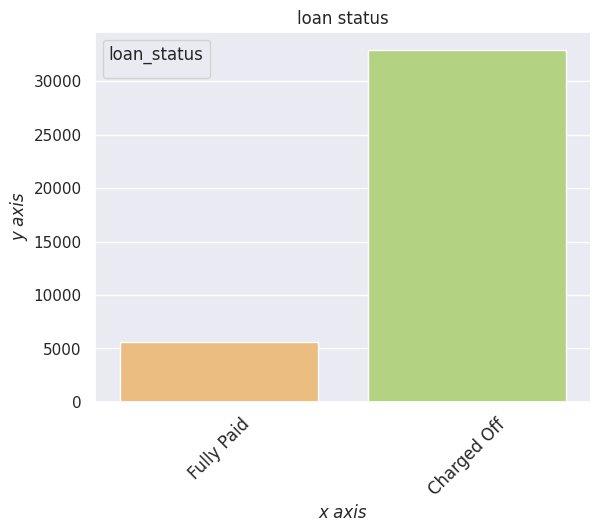

In [ ]:
sns.set(style='darkgrid')
plt.xlabel("x axis",fontstyle='italic')
plt.ylabel("y axis",fontstyle='italic')
plt.title("loan status")
plt.legend(title="loan_status",loc="upper left")

ax=sns.countplot(x="loan_status",data=loan,palette='RdYlGn')
ax.set_xticklabels(['Fully Paid','Charged Off'],rotation =45,fontsize=12)
plt.show()



##data analysis
1.derived columns
2.univariant analysis
3.bivariant analysis

##derived columns

In [ ]:
loan['issue_d']

,issue_d
0,Dec-11
1,Dec-11
2,Dec-11
3,Dec-11
5,Dec-11
...,...
39712,Jul-07
39713,Jul-07
39714,Jul-07
39715,Jul-07


we will be extraacting months from year like we will displace each of them individually

In [ ]:
loan['issue_d']=pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['issue_m'] = loan['issue_d'].dt.month   # month number
loan['issue_y'] = loan['issue_d'].dt.year

In [ ]:
loan[['issue_d','issue_m','issue_y']]

,issue_d,issue_m,issue_y
0,2011-12-01,12,2011
1,2011-12-01,12,2011
2,2011-12-01,12,2011
3,2011-12-01,12,2011
5,2011-12-01,12,2011
...,...,...,...
39712,2007-07-01,7,2007
39713,2007-07-01,7,2007
39714,2007-07-01,7,2007
39715,2007-07-01,7,2007


In [ ]:
loan['issue_y']

,issue_y
0,2011
1,2011
2,2011
3,2011
5,2011
...,...
39712,2007
39713,2007
39714,2007
39715,2007


##loan issue year analysis

In [ ]:
sns.set(style='white')
plt.figure(figsize=(5,5))
br=pd.DataFrame(loan.issue_y.value_counts().sort_values())
br.reset_index(inplace=True)
br



,issue_y,count
0,2007,251
1,2008,1562
2,2009,4716
3,2010,11532
4,2011,20516


<Figure size 500x500 with 0 Axes>

from this we can easily see that through the years the loan issued is increasing ,lets visialise it statically

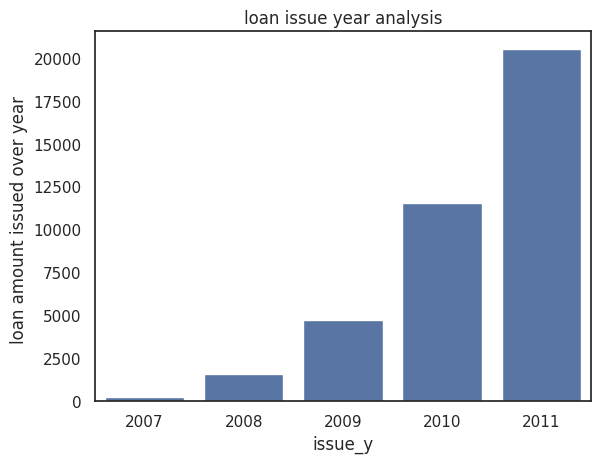

In [ ]:
#1.setting the title of the barplot
plt.title("loan issue year analysis")
#2.now we will be applying the labels of the plot
plt.xlabel("issue_y")
plt.ylabel("loan amount issued over year ")
#3.now we will be plotting the barplot
sns.barplot(x='issue_y',y='count',data=br)
plt.show()

so from this we can clealry see that loan comany have increasingly issued the loan over the years

In [ ]:
#now we will be comparing the default rates of the loan issued over the years


as we will be using the loan_status as driving variabel to compare each and every variables that we will compare,so we will making a function of it

In [ ]:
def driving_var(most_used,kind='bar',palette='coolwarm'):
  sns.catplot(x=most_used,y='loan_status',data=loan,hue=most_used,kind=kind,palette=palette)
  plt.xlabel(most_used)
  plt.ylabel("loan_satus")
  plt.show()

now we have made a function of loan status which will help us to reduce our code size

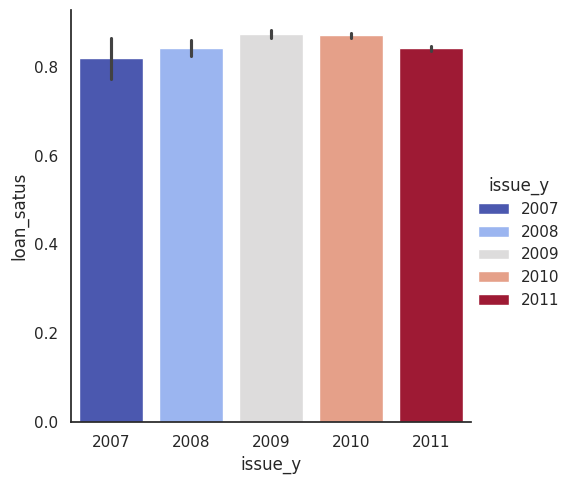

In [ ]:
#comparing issueed loan amount vs loan_status
driving_var('issue_y')

now we have made a function of loan staus which helps me to use it again and again ,now for refrence i have given violoin plot as to check the working of catplot ,now we will be analysing it with box plot to get a clear pitcture

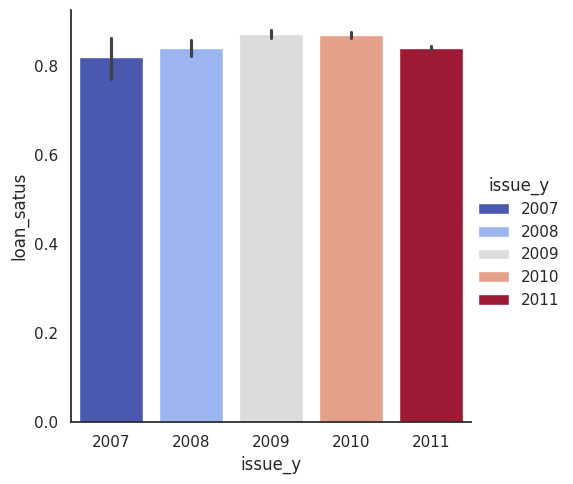

In [ ]:
driving_var("issue_y")

##3.2 Univariate Analysis
Following fields will be checked as part of univariate analysis

1. Categorical variables
   1. Ordered categorical data
      1. Grade (grade)
      2. Sub grade (sub_grade)
      3. Term (36 / 60 months) (term)
      4. Employment length (emp_length)
      5. Issue year (issue_y)
      6. Issue month (issue_m)
      7. Issue quarter (issue_q)

2. Unordered categorical data
      1. Address State (addr_state)
      2. Loan purpose (purpose)
      3. Home Ownership (home_ownership)
      4. Loan status (loan_status)
      5. Loan paid (loan_paid)
2. Quantitative variables
    1. Interest rate bucket (int_rate_bucket)
    2. Annual income bucket (annual_inc_bucket)
    3. Loan amount bucket (loan_amnt_bucket)
    4. Funded amount bucket (funded_amnt_bucket)
    5. Debt to Income Ratio (DTI) bucket (dti_bucket)
    6. Monthly Installment (installment)

we will be making the function of all the unordered variables so code lenght will be reduced ,

1.as we are making some functions of multipule varables we will store them all in a particular variable for ex $unordred  cat  var$

In [ ]:
un_cat_var=['addr_state','purpose','home_ownership','loan_status','loan_paid']

we have saved all our un cat var in a one single var and now we will be making the function out of it


In [ ]:
#1.making a fun
def unordered_cat_var(un_cat_var,palette='coolwarm',rotation=90):
  plt.xlabel(un_cat_var)

  sns.countplot(x=un_cat_var,data=loan,palette=palette)
  plt.xticks(rotation=rotation)
  plt.show()

/tmp/ipython-input-2477762491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=un_cat_var,data=loan,palette=palette)


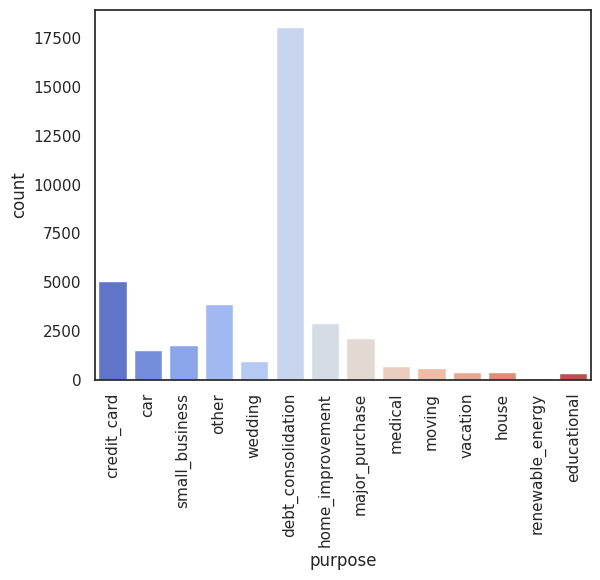

In [ ]:
unordered_cat_var('purpose')

conclusion:-debt consolidation  is the loan purpose that asked for the most

/tmp/ipython-input-2477762491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=un_cat_var,data=loan,palette=palette)


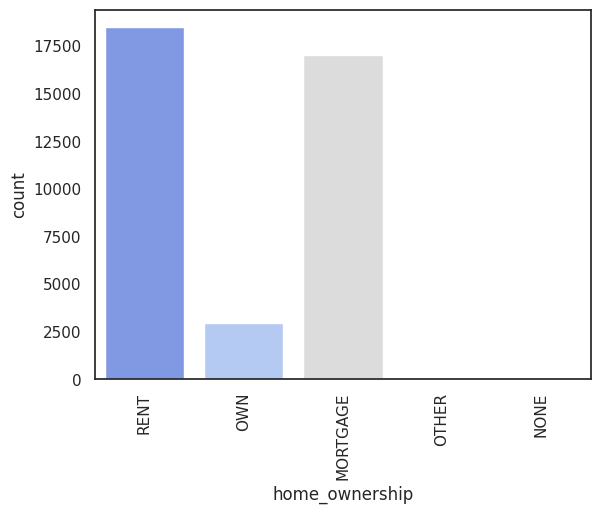

In [ ]:
unordered_cat_var('home_ownership')

/tmp/ipython-input-2477762491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=un_cat_var,data=loan,palette=palette)


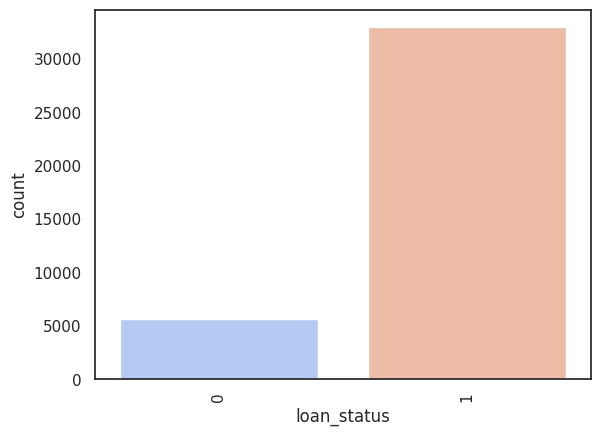

In [ ]:
unordered_cat_var('loan_status')

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38577 non-null  int64         
 1   member_id                   38577 non-null  int64         
 2   loan_amnt                   38577 non-null  int64         
 3   funded_amnt                 38577 non-null  int64         
 4   funded_amnt_inv             38577 non-null  float64       
 5   term                        38577 non-null  object        
 6   int_rate                    38577 non-null  float64       
 7   installment                 38577 non-null  float64       
 8   grade                       38577 non-null  object        
 9   sub_grade                   38577 non-null  object        
 10  emp_title                   36191 non-null  object        
 11  emp_length                  37544 non-null  object        


as we have removed addr_state as it is a personal information of the applicant so we wont plot the graph for it here

# 2.oredered categorial var

In [ ]:
cat_var=['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m']

In [ ]:
def ordered_cat_var(cat_var,palette='coolwarm',rotation=90):
  plt.xlabel(cat_var)
  sns.countplot(x=cat_var,data=loan,palette=palette)
  plt.xticks(rotation=rotation)
  plt.show()

/tmp/ipython-input-1865677914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_var,data=loan,palette=palette)


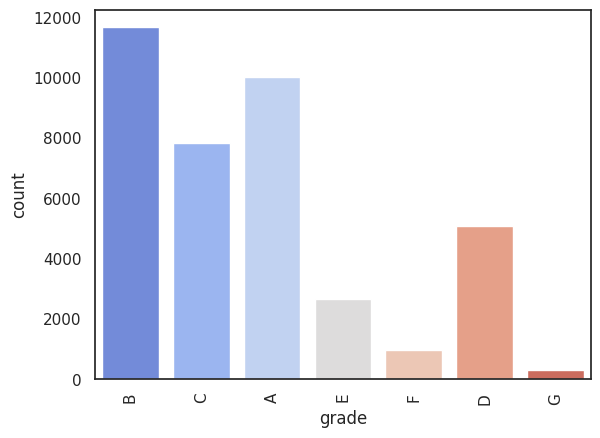

In [ ]:
ordered_cat_var('grade')

/tmp/ipython-input-1865677914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_var,data=loan,palette=palette)


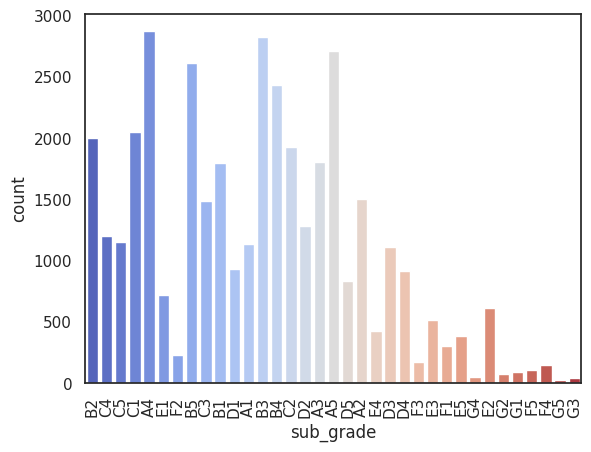

In [ ]:
ordered_cat_var('sub_grade')

/tmp/ipython-input-1865677914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_var,data=loan,palette=palette)


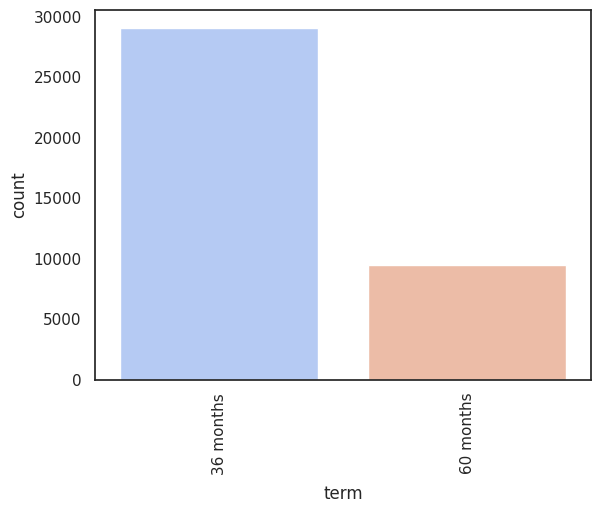

In [ ]:
ordered_cat_var('term')

/tmp/ipython-input-1865677914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_var,data=loan,palette=palette)


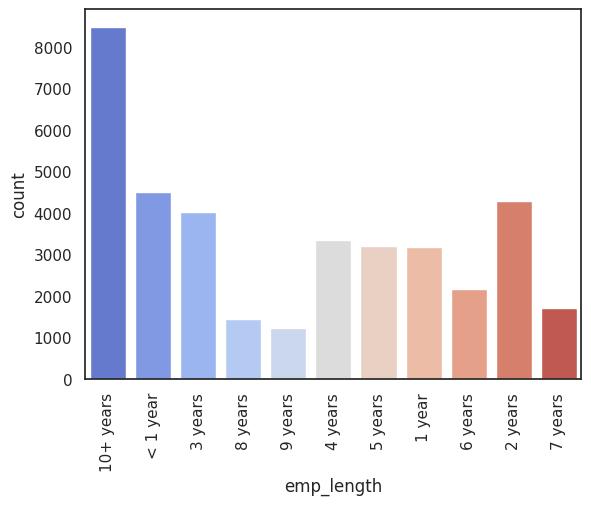

In [ ]:
ordered_cat_var('emp_length')

/tmp/ipython-input-1865677914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_var,data=loan,palette=palette)


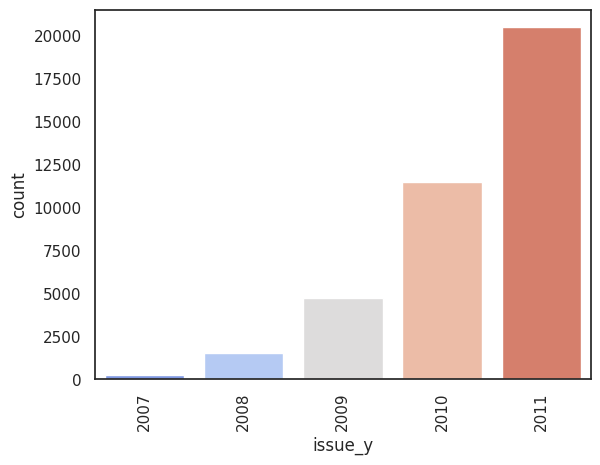

In [ ]:
ordered_cat_var('issue_y')

/tmp/ipython-input-1865677914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_var,data=loan,palette=palette)


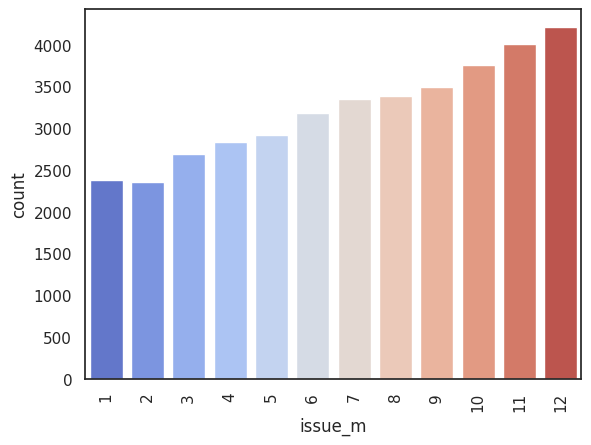

In [ ]:
ordered_cat_var('issue_m')

Observations and Inferences from Univariate Analysis
#Ordered Categorical Variables
Grade B had the highest number of "Charged off" loan applicants, with a total of 1,352 applicants, indicating that applicants with this credit grade faced challenges in repaying their loans.

Short-term loans with a duration of 36 months were the most popular among "Charged off" applicants, with 3,006 applications. This suggests that a significant portion of applicants who experienced loan default chose shorter repayment terms.

Applicants who had been employed for more than 10 years accounted for the highest number of "Charged off" loans, totaling 1,474. This indicates that long-term employment history did not necessarily guarantee successful loan repayment.

The year 2011 recorded the highest number of "Charged off" loan applications, totalling 3,152, signaling a positive trend in the number of applicants facing loan defaults over the years. This could be indicative of economic or financial challenges during that year.

"Charged off" loans were predominantly taken during the 4th quarter, with 2,284 applications, primarily in December. This peak in loan applications during the holiday season might suggest that financial pressures during the holidays contributed to loan defaults.

#Unordered Categorical Variables
California had the highest number of "Charged off" loan applicants, with 1,055 applicants. For such applicants, the lending company needs to implement stricter eligibility criteria or credit assessments due to a higher number of "Charged off" applicants from this state.

Debt consolidation was the primary loan purpose for most "Charged off" loan applicants, with 2,633 applicants selecting this option. The lending company needs to exercise caution when approving loans for debt consolidation purposes, as it was the primary loan purpose for many "Charged off" applicants.

The majority of "Charged off" loan participants, totaling 2,715 individuals, lived in rented houses. The lending company must assess the financial stability of applicants living in rented houses, as they may be more susceptible to economic fluctuations.

A significant number of loan participants, specifically 5,317 individuals, were loan defaulters, unable to clear their loans. The lending company should enhance risk assessment practices, including stricter credit checks and lower loan-to-value ratios, for applicants with a history of loan defaults. They should offer financial education and support services to help borrowers manage their finances and improve loan repayment outcomes.

#Bivariant Analysis

3.3. Bivariate Analysis
Following fields will be analysed as part of bivariate analysis against Loan Status (loan_status) column

1. Categorical variables
1. Ordered categorical data
    1. Grade (grade)
    2. Sub grade (sub_grade)
    3. Term (36 / 60 months) (term)
    4. Employment length (emp_length)
    5. Issue year (issue_y)
    6. Issue month (issue_m)
    7. Issue quarter (issue_q)

2. Unordered categorical data
    1. Loan purpose (purpose)
    2. Home Ownership (home_ownership)
    3. Verification Status (verification_status)
    4. Address State (addr_state)
    


In [ ]:
cat_var_bi=['grade','sub_grade','term','emp_length','issue_y','issue_m']

In [ ]:
def categorial_variable_bi(cat_var_bi,palette='Set2',rotation=90):
  plt.figure(figsize=(12,8))
  sns.set_style('whitegrid')
  xlabel=f'{cat_var_bi}'
  title=f'loan_status vs {cat_var_bi} '
  ax=sns.countplot(x=cat_var_bi,hue='loan_status',palette=palette,data=loan)
  for container in ax.containers:

    ax.bar_label(container,fmt='%d',label_type='edge',padding=3)
  plt.xticks(rotation=rotation)
  plt.show()

#1.grade vs loan_status

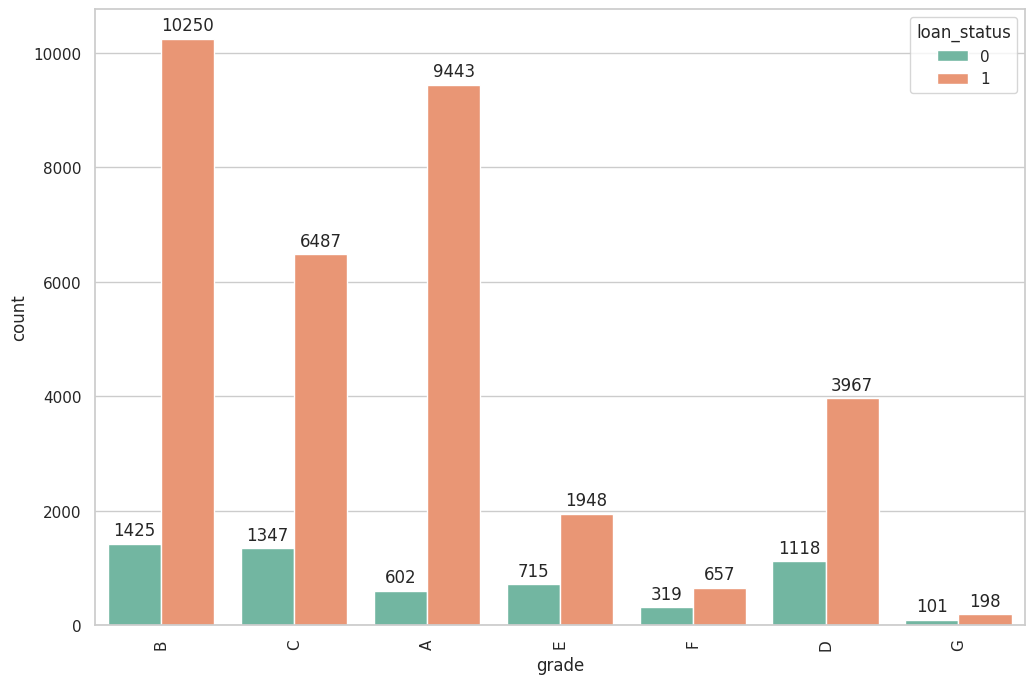

In [ ]:
categorial_variable_bi('grade')

#2.subgrade vs loan_status

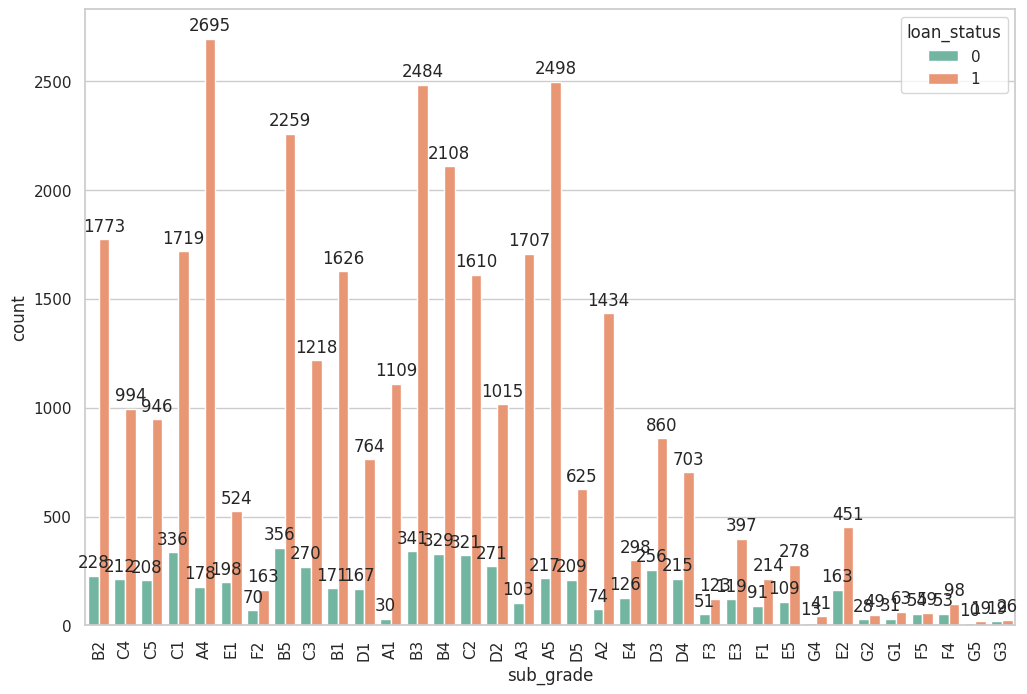

In [ ]:
categorial_variable_bi('sub_grade')

#3.term vs loan_status

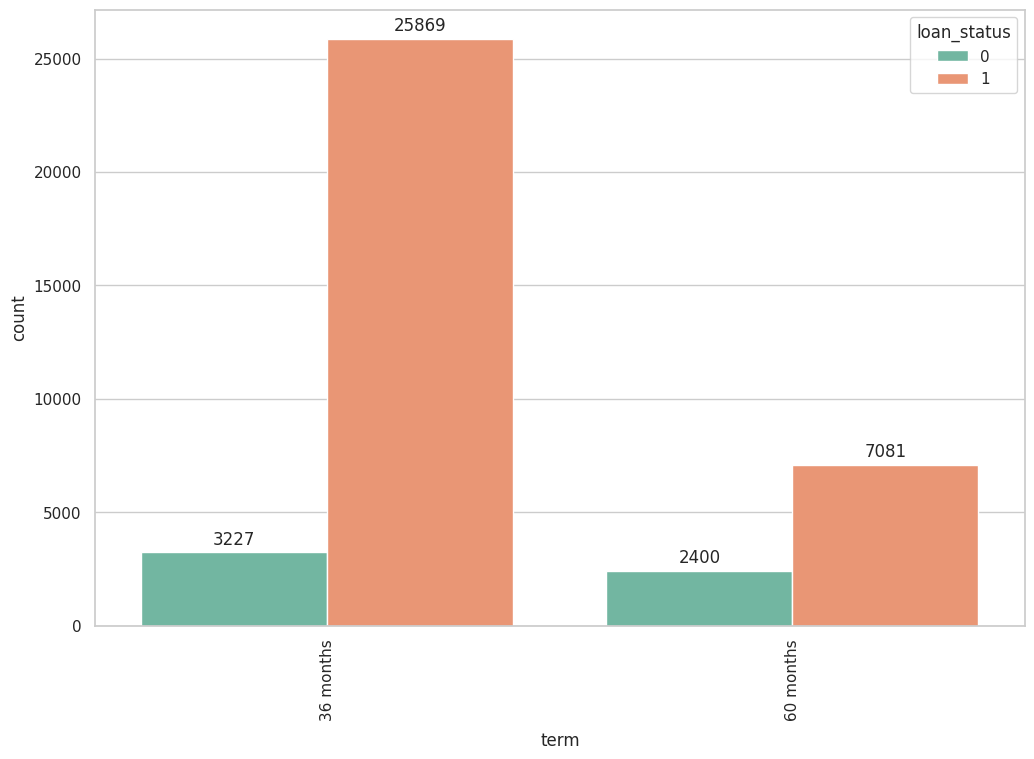

In [ ]:
categorial_variable_bi('term')

#4.issued_year vs loan_status

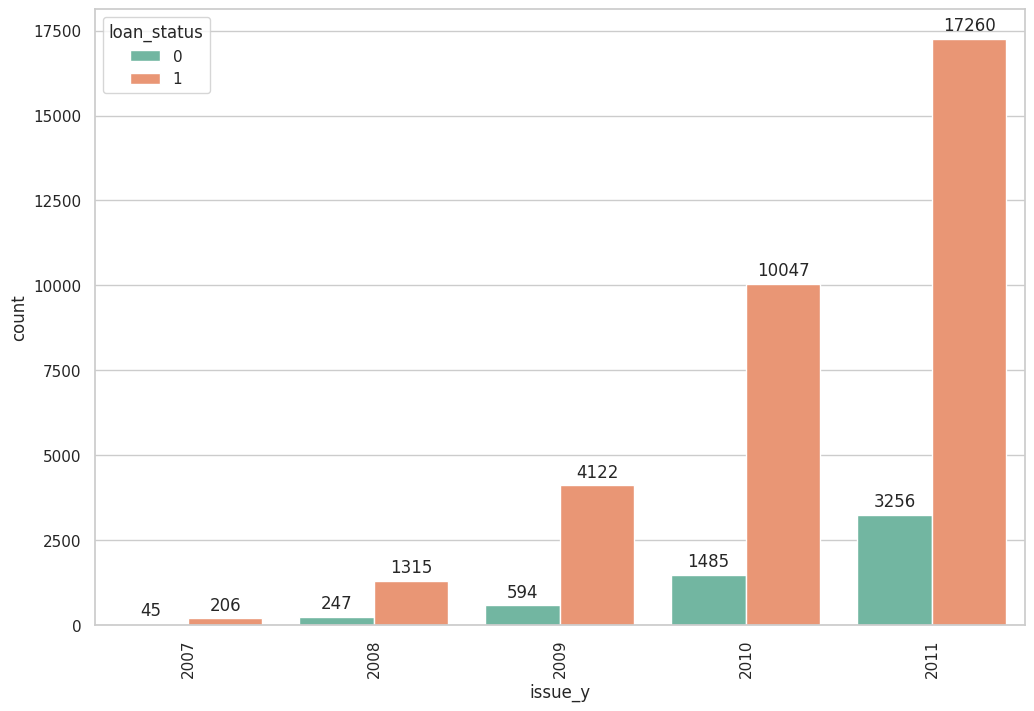

In [ ]:
categorial_variable_bi('issue_y')

the loan. applicants have increased over years and as the applicants increased we also see that the applicants with the charged off status also increases

#5.issued_month vs loan_status

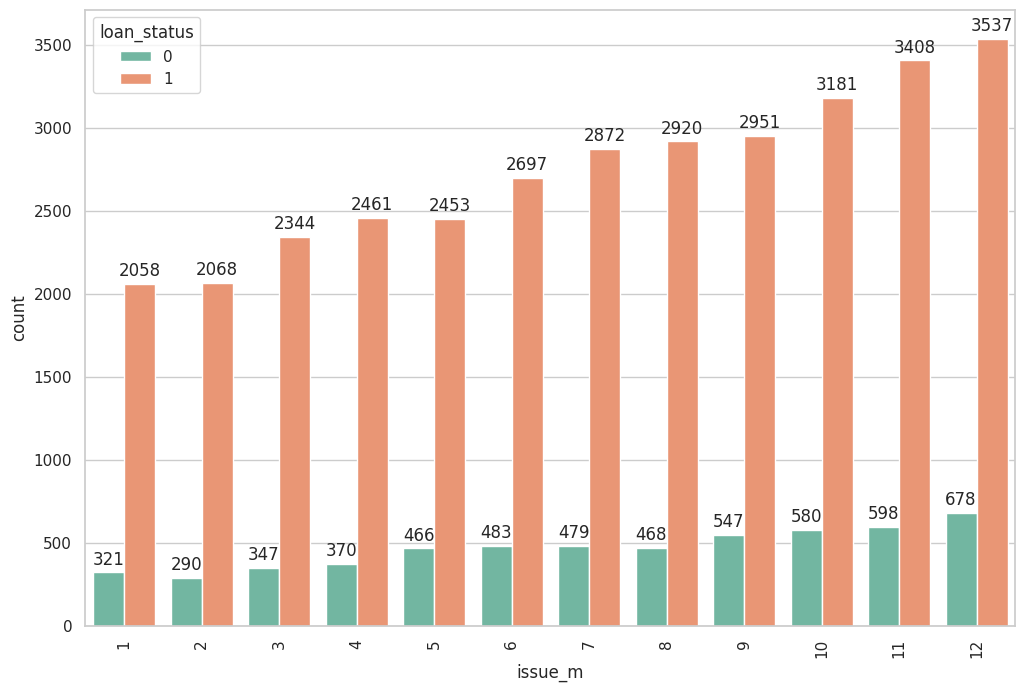

In [ ]:
categorial_variable_bi('issue_m')

the overall graph looks preety much healthy as the fully paid applicants are more than then the charged of ones , now  the dec have the highest month of loan issued may be because of the holidays , and also with that , the charged off applicants are also highest in the month of dec


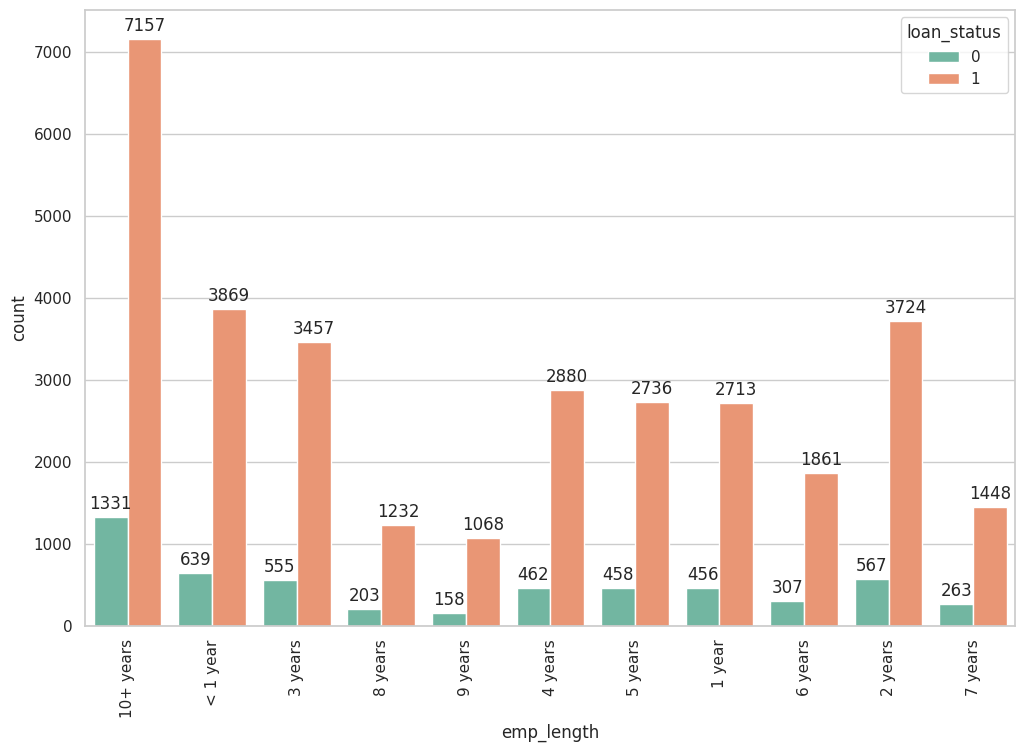

In [ ]:
categorial_variable_bi('emp_length')

Most number of the loans are 10 or more years of experince . They are the one who are also most likely to default

#Bivariant Analysis of Unordered Categorial Variable

In [ ]:
uncat_var_bi=['purpose','home_ownership','verification_status']

In [ ]:
#now we will be making a function
def unordered_cat_var_bi(uncat_var_bi,palette='Set2',rotation=90):
  plt.figure(figsize=(12,8))
  sns.set_style('whitegrid')
  xlabel=f'{uncat_var_bi}'
  title=f'loan_status vs {uncat_var_bi} '
  ax=sns.countplot(x=uncat_var_bi,hue='loan_status',palette=palette,data=loan)
  for container in ax.containers:

    ax.bar_label(container,fmt='%d',label_type='edge',padding=3)
  plt.xticks(rotation=rotation)
  plt.show()

#1.purpose vs loan_status

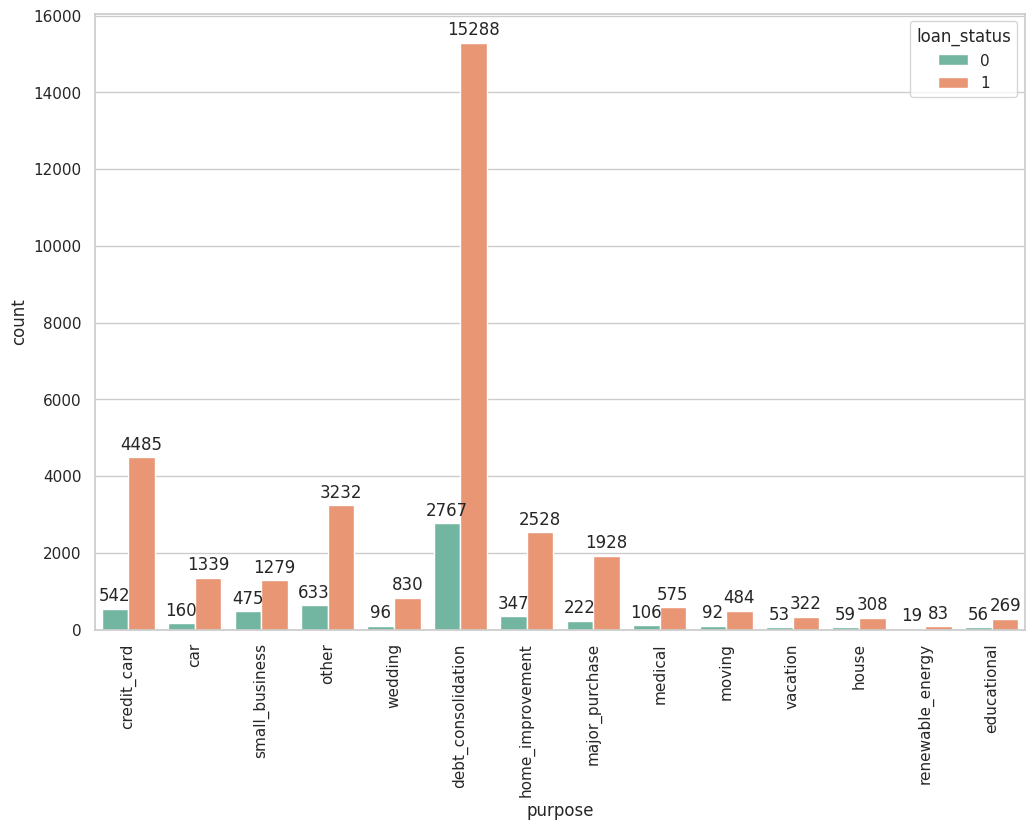

In [ ]:
unordered_cat_var_bi('purpose')

debt_consodilation is the cat where the loan is issued the most and it is also the the cat witht the most defaults

#2. home_ownership vs loan_status

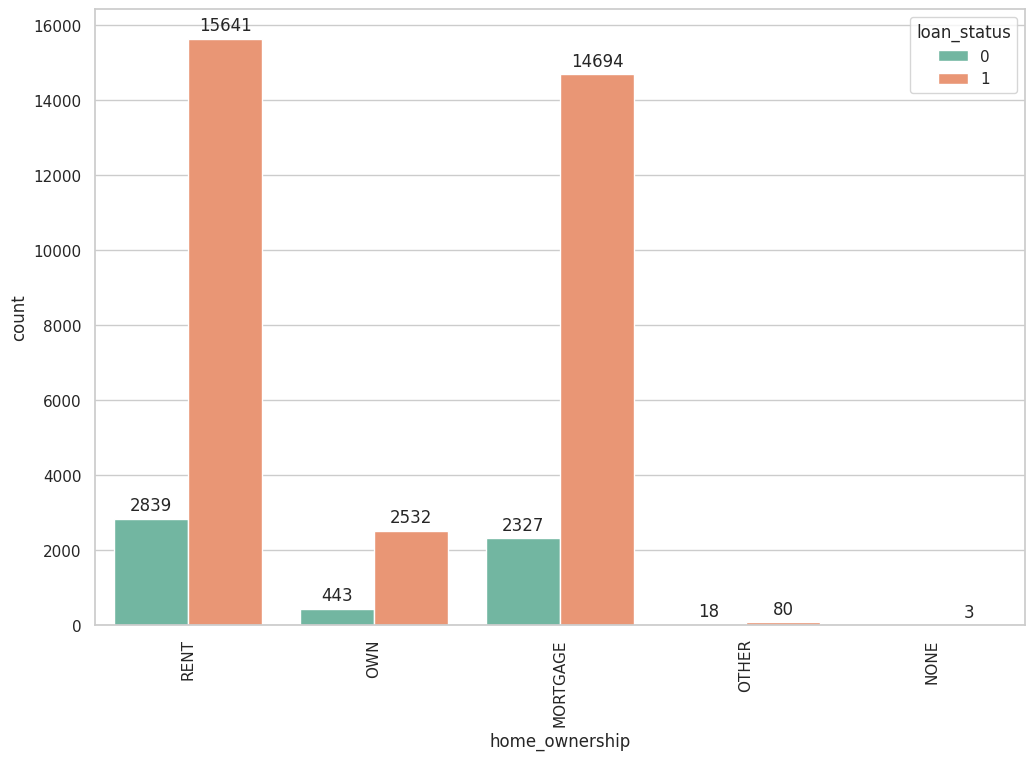

In [ ]:
unordered_cat_var_bi('home_ownership')

the loan for renting a home is issued the most and with that it is also the same cat with the most defaultes defaulting the loan , following it the mortage is the second highest default applicants

#3. verification_status vs loan_status

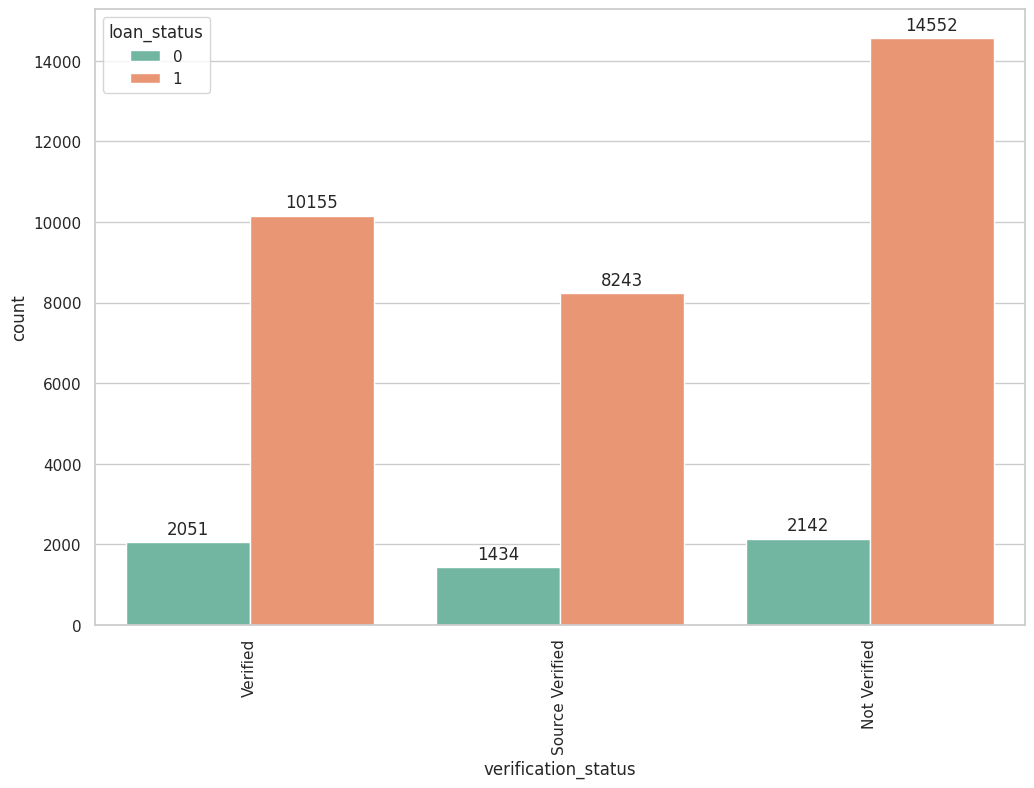

In [ ]:
unordered_cat_var_bi('verification_status')

surpsingly the ppl who are verified are evenly the most defaulters after the not veified one , it is quit surprising !

#Summary of Bivariate Analysis
1.The loan applicants belonging to Grades B, C, and D contribute to most of the "Charged Off" loans.

2.Loan applicants belonging to Sub Grades B3, B4, and B5 are more likely to charge off.

3.Loan applicants applying for loans with a 60-month term are more likely to default than those taking loans for 36 months.

4.Most loan applicants have ten or more years of experience, and they are also the most likely to default.

5.The number of loan applicants has steadily increased from 2007 to 2011, indicating a positive trend in the upcoming years.

6.December is the most preferred month for taking loans, possibly due to the holiday season.

7.The fourth quarter (Q4) is the most preferred quarter for taking loans, primarily because of the upcoming holiday season.

8.Debt consolidation is the category where the maximum number of loans are issued, and people have defaulted the most in the same category.

9.Loan applicants who live in rented or mortgaged houses are more likely to default.

10.Verified loan applicants are defaulting more than those who are not verified.

11.Loan applicants from the states of California (CA), Florida (FL), and New York (NY) are most likely to default.

12.A majority of the loan applicants who defaulted received loan amounts of $15,000 or higher.

13.The majority of loan applicants who charged off had significantly high Debt-to-Income (DTI) ratios.

14.A significant portion of loan applicants who defaulted received loans with interest rates falling within the range of 13% to 17%.

15.A majority of the loan applicants who charged off reported an annual income of less than $40,000.

#Inferences of Bivariate Analysis
$Risk Assessment for Grades B, C, and D$: Since loan applicants from Grades B, C, and D contribute to most of the "Charged Off" loans, the company should consider implementing stricter risk assessment and underwriting criteria for applicants falling into these grades.

$Subgrades B3, B4, and B5$: Pay special attention to applicants with Subgrades B3, B4, and B5, as they are more likely to charge off. Implementing additional risk mitigation measures or offering them lower loan amounts could be considered.

$Term Length$: Given that applicants opting for 60-month loans are more likely to default, the company should consider evaluating the risk associated with longer-term loans and potentially limiting the maximum term or adjusting interest rates accordingly.

$Experience and Default Probability$: Loan applicants with ten or more years of experience are more likely to default. This suggests that experience alone may not be a reliable indicator of creditworthiness. The company should use a more comprehensive credit scoring system that factors in other risk-related attributes.

$Positive Growth Trend$: The steady increase in the number of loan applicants from 2007 to 2011 indicates growth in the market. The company can capitalize on this trend by maintaining a competitive edge in the industry while keeping risk management practices robust.

$Seasonal Trends$: December and Q4 are peak periods for loan applications, likely due to the holiday season. The company should anticipate increased demand during these periods and ensure efficient processing to meet customer needs.

$Debt Consolidation Risk$: Since debt consolidation is the category with the maximum number of loans and high default rates, the company should carefully evaluate applicants seeking debt consolidation loans and potentially adjust interest rates or offer financial counseling services.

$Housing Status and Default Risk$: Applicants living in rented or mortgaged houses are more likely to default. This information can be considered in the underwriting process to assess housing stability and its impact on repayment ability.

$Verification Process$: Verified loan applicants are defaulting more than those who are not verified. The company should review its verification process to ensure it effectively assesses applicant creditworthiness and consider improvements or adjustments.

$Geographic Risk$: Loan applicants from states like California (CA), Florida (FL), and New York (NY) are more likely to default. The company should monitor regional risk trends and adjust lending strategies or rates accordingly in these areas.

$High Loan Amounts$: Applicants receiving loan amounts of $15,000 or higher are more likely to default. The company can mitigate this risk by conducting more thorough assessments for larger loan requests and potentially capping loan amounts for higher-risk applicants.

$DTI and Interest Rates$: High Debt-to-Income (DTI) ratios and interest rates in the 13%-17% range are associated with defaults. The company should review its interest rate determination process and consider adjusting rates based on DTI ratios to better align with the borrower's ability to repay.

$Low Annual Income$: Applicants with annual incomes less than $40,000 have a higher likelihood of defaulting. The company should consider offering financial education resources or setting maximum loan amounts based on income levels to ensure affordability for borrowers.